In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("apples_dataset_semicolon.csv", sep=";")
df.head()

,Weight,Redness,Label
0,205.357886,0.733305,1
1,173.010939,0.727020,1
2,180.492302,0.731464,1
3,186.112744,0.793850,1
4,168.166155,0.756035,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   500 non-null    float64
 1   Redness  500 non-null    float64
 2   Label    500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [9]:
df.describe()

,Weight,Redness,Label
count,500.000000,500.000000,500.000000
mean,164.319385,0.598903,0.500000
std,22.271231,0.174832,0.500501
min,95.994309,0.193705,0.000000
25%,149.186786,0.450924,0.000000
50%,166.152824,0.607056,0.500000
75%,180.235606,0.742005,1.000000
max,213.899205,1.000000,1.000000


In [11]:
df.isna().sum()

Weight     0
Redness    0
Label      0
dtype: int64

In [13]:
df['Label'].value_counts()

Label
1    250
0    250
Name: count, dtype: int64

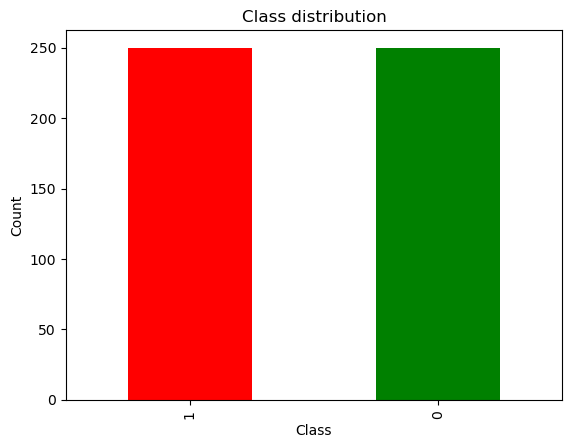

In [15]:
df['Label'].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

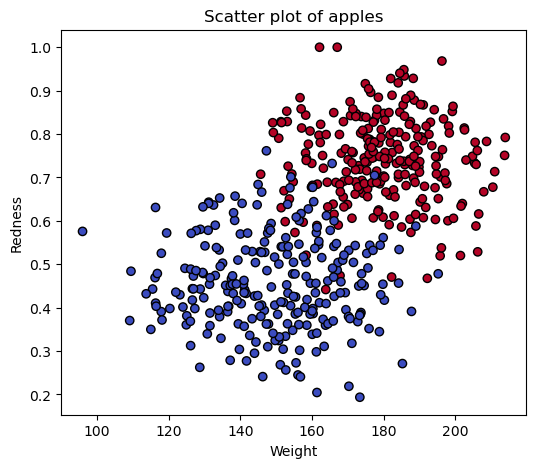

In [17]:
plt.figure(figsize=(6,5))
plt.scatter(df['Weight'], df['Redness'], c=df['Label'], cmap='coolwarm', edgecolor='k')
plt.xlabel("Weight")
plt.ylabel("Redness")
plt.title("Scatter plot of apples")
plt.show()